<a href="https://colab.research.google.com/github/vvillarroelc/MantenimientoPredictivo/blob/main/Ejemplo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 1: Análisis por envolvente en rodamientos

# Frecuencias características en rodamientos

Los rodamientos están formados por varios componentes claramente diferenciados, en particular: La pista interior y exterior, la jaula y los elementos rodantes. El deterioro de alguno o varios de estos componentes generarán vibraciones con frecuencias características que mediante un adecuado análisis permitirán identificar y diagnosticar fallas en alguno de estos componentes.

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo1/rodamiento.jpg" height="400"></div>

# Envolvente

Para el caso de diagóstico de fallas en rodamiento, existe un método ampliamente utilizado el cual es el **análisis por envolvente**, a continuación se presenta una figura que muestra gráficamente este concepto: 


<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo1/envolvente.png" height="500"></div>

La señal en negro corresponde a la señal **original** y la roja corresponde a la **envolvente**, que basicamente como dice su nombre "envuelve" a la señal original. Ahora, ¿Por qué es útil este método? La respuesta es que la envolvente permite identificar fenómenos de frecuencia más baja (**envolvente**) y descartar fenomenos de alta frecuencia (**señal original**).

Para el caso particular de análisis de rodamientos, si es que algún componente del rodamiento presenta fallas (por ejemplo una grieta) generará impactos vibratorios de alta frecuencia. Estas vibraciones de alta frecuencia asociadas a los impactos no son de interés en el análisis vibracional, la información de interés es el **tiempo entre impactos**, es decir, una fenómeno de frecuencia más baja que se puede extraer mediante el **análisis por envolvente**. Esta es la razón del amplio uso de la técnica de envolvente en el análisis de rodamientos. Lo anterior se muestra gráficamente en la siguiente: 


<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo1/impacto.jpg" height="300"></div>

# Ejemplo práctico

Se cuenta con datos de un montaje experimental, en particular, un motor eléctrico con 2 rodamientos (Fan end bearing y Drive end bearing), sobre el rodamiento de la salida del motor se indujeron fallas sobre la pista interna (pequeña grieta).

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo1/Configuracion.png" height="300"></div>

La **velocidad de giro** del eje es de 30 [Hz] y la frecuenta característica de la pista interna del rodamiento (BPFI: Ball-Pass Freq. of Inner Race) es de 5.99 [Hz]. Se cuenta con datos temporales de aceleración de la pista interna del rodamiento, los cuales analizaremos a continuación por medio de un análisis de envolvente. 


El dataset se encuentra en el archivo `inner.mat` contenido en el github del curso. Lo primero es cargar la información:

In [ ]:
!git clone https://github.com/leoonhardt/mantenimientopredictivo.git

Cloning into 'mantenimientopredictivo'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 121 (delta 40), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (121/121), 34.35 MiB | 21.97 MiB/s, done.
Resolving deltas: 100% (40/40), done.


Ya cargada la información, se procede a importar las diversas librerías a utilizar y a importar el set de datos a utilizar.


In [ ]:
#importar librerías
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp
from scipy.fftpack import fft, fftfreq

#leer datos
Datos0=sio.loadmat('datos//ejemplo1//inner.mat')

print(Datos0.keys())


dict_keys(['__header__', '__version__', '__globals__', 'Fs', 't', 'x'])


Como podemos ver, el set de datos contiene una señal temporal (**t**), aceleración (**x**) y la frecuencia de muestro (**Fs**). Procedemos a extraer y manipular estos datos, para posteriormente calcular su envolvente por medio de la función *hilbert()* importada anteriormente.

In [ ]:
x=Datos0['x'][:,0]
t=np.transpose(Datos0['t'])[:,0]
print(len(x))
#calcular envolvente
env= np.abs(hilbert(x))

122136


Contando ya con los datos temporales y la envolvente de la señal, se procede a graficar:

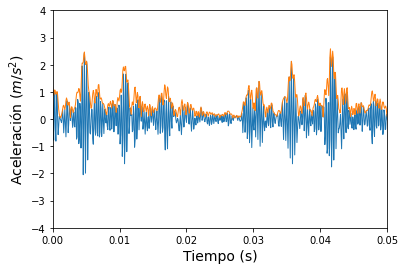

In [ ]:
#graficar
plt.plot(t,x,linewidth=1)
plt.plot(t,env,linewidth=1)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
#Establecemos límites para observar el comportamiento de la señal temporal en detalle:
plt.xlim(0,0.05)
plt.ylim(-4,4)
plt.show() # mostramos el plot


Como podemos ver, la envolvente (color naranjo en el gráfico) nos muestra un comportamiento donde cada cierto tiempo existe un impulso con una amplitud más alta, estos impactos son justamente los asociados a las fallas del rodamiento. Dicho lo anterior, compararemos el espectro de Fourier de la señal original y de la envolvete:

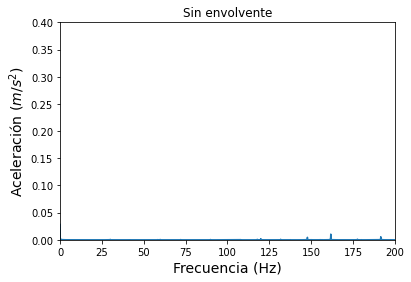

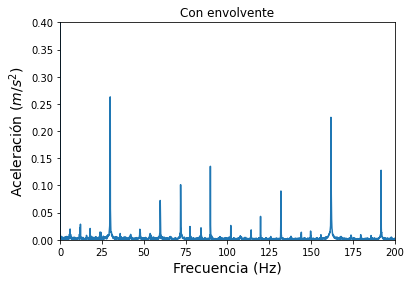

In [ ]:
#Transformada de Fourier
L=len(x)
dt=t[2]-t[1]
Fx = fft(x)[0:int(L/2)]/(L/2) #Transformada de Fourier de señal original (Frecuencias positivas)
Fe = fft(env)[0:int(L/2)]/(L/2) #Transformada de Fourier de envolvente (Frecuencias positivas)
frq = fftfreq(L,dt)[0:int(L/2)] #Frecuencias

plt.plot(frq,abs(Fx))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Sin envolvente')
#Establecemos limites
plt.xlim(0,200)
plt.ylim(0,0.4)
plt.show()


plt.plot(frq,abs(Fe))
plt.xlabel('Frecuencia (Hz)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Con envolvente')
#Establecemos limites
plt.xlim(0,200)
plt.ylim(0,0.4)
plt.show()

Para comparar el espectro de frecuencia de ambas señales se utilizó la misma ventana de amplitud en el eje y ([0,0.4]). Como es visible en los gráficos anteriores, la envolvente permite identificar de mucha mejor forma ciertas peaks de frecuencias características asociadas a una falla particular en el rodamiento, en este caso, en la pista interna. 

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo1/Resultado.png" height="500"></div>

Como podemos ver, en el gráfico se observan claramente las frecuencias asociadas a la velocidad de giro del eje (1x, 2x y 3x) y hay un marcado peak de 27 veces la BPFI con bandas laterales a 30 Hz de distancia, es decir, modulada por la frecuencia de giro del eje. Lo más relevante del espectro anterior es la presencia de múltiplos del BPFI (Separados cada 5.99 [Hz]) los cuales son indicadores de una falla en las pista interna. 